In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv",sep="\t")

In [5]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [15]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

# Data Balancing

In [18]:
ham = df[df['label']=='ham']
ham.shape

(4516, 4)

In [20]:
spam = df[df['label']=='spam']
spam.shape

(653, 4)

In [21]:
ham = ham.sample(spam.shape[0])

In [23]:
ham.shape

(653, 4)

In [24]:
data = pd.concat([ham,spam],axis=0,ignore_index=True)

In [26]:
data.shape

(1306, 4)

In [27]:
data['label'].value_counts()

label
ham     653
spam    653
Name: count, dtype: int64

# EDA

In [29]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('ggplot')

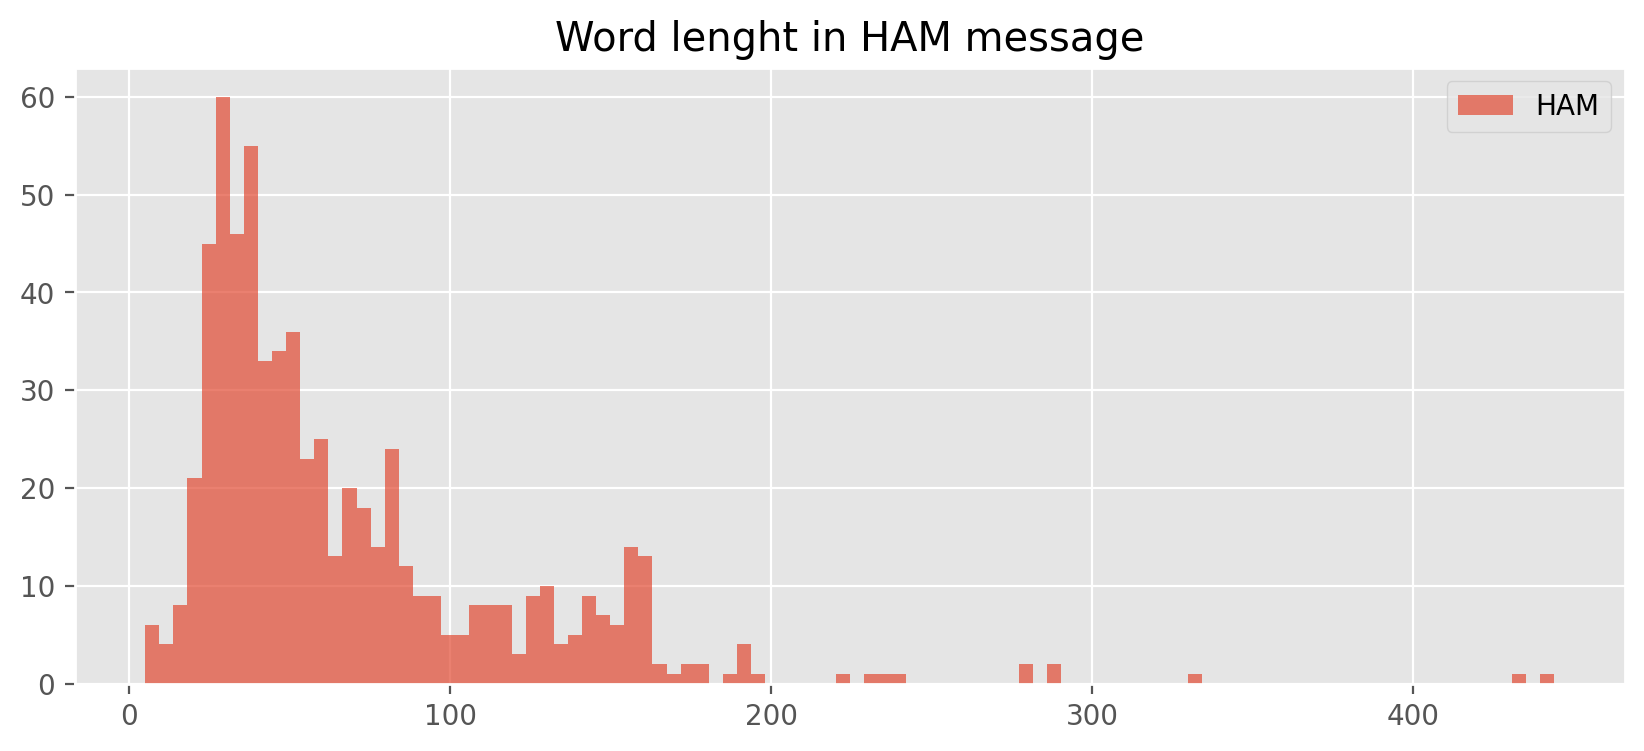

In [48]:
ham.columns
plt.hist(ham['length'],bins=100,alpha=0.7,label='HAM')
plt.title("Word lenght in HAM message")
plt.legend()
plt.show()


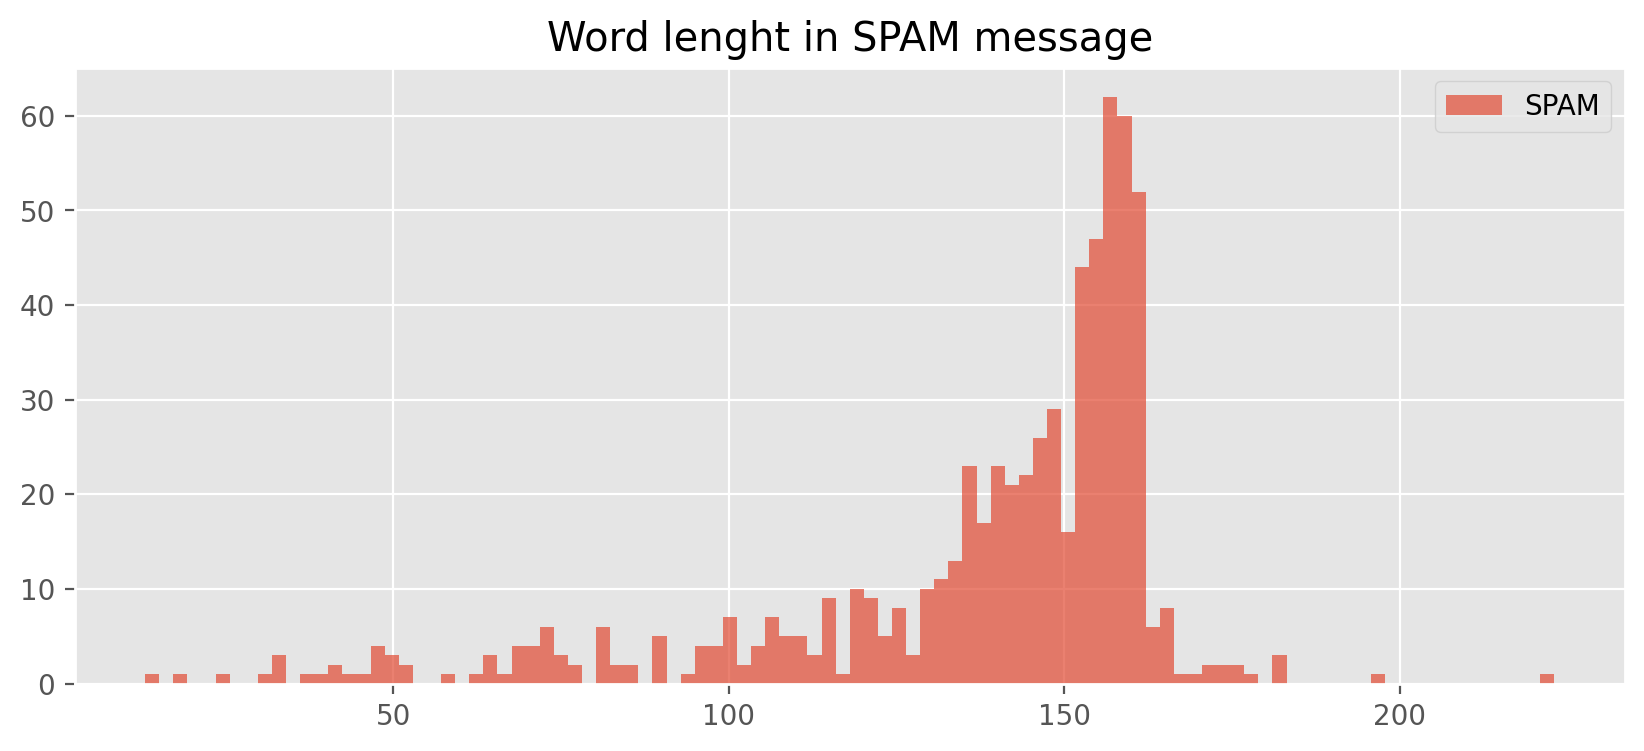

In [49]:
ham.columns
plt.hist(spam['length'],bins=100,alpha=0.7,label='SPAM')
plt.legend()
plt.title("Word lenght in SPAM message")
plt.show()


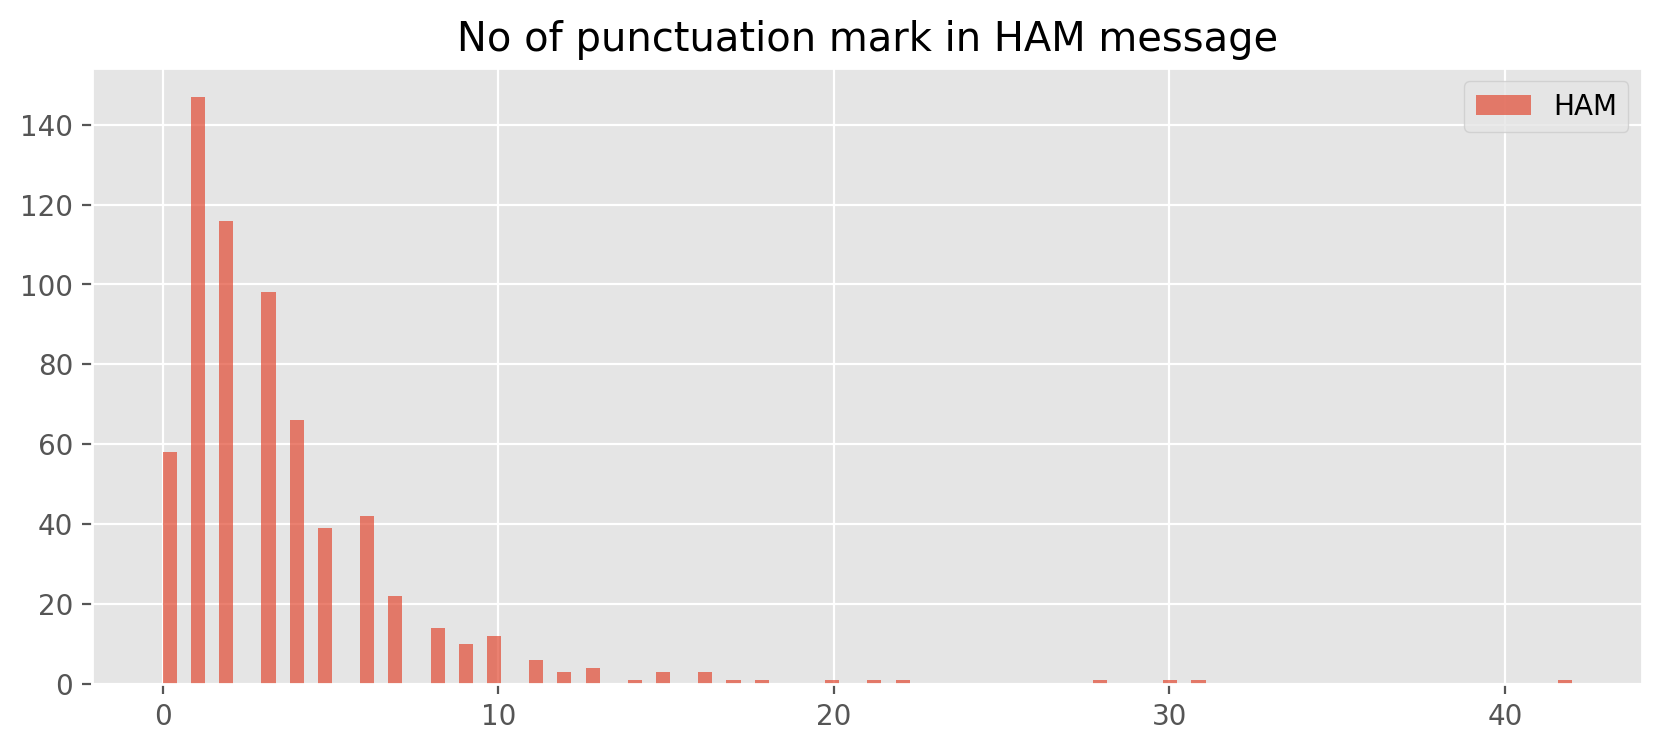

In [53]:
ham.columns
plt.hist(ham['punct'],bins=100,alpha=0.7,label='HAM')
plt.legend()
plt.title("No of punctuation mark in HAM message")
plt.show()

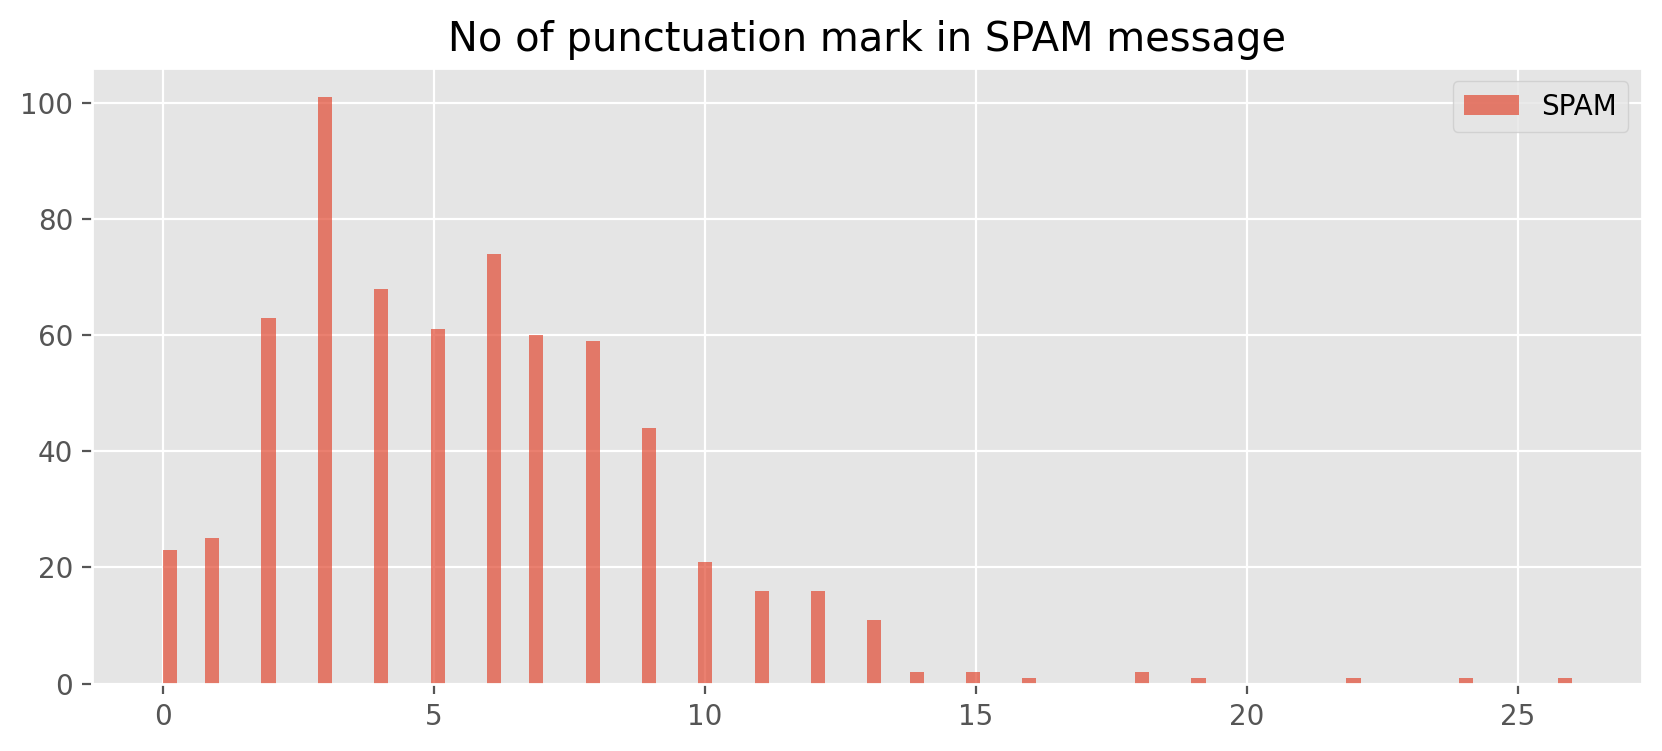

In [54]:
spam.columns
plt.hist(spam['punct'],bins=100,alpha=0.7,label='SPAM')
plt.legend()
plt.title("No of punctuation mark in SPAM message")
plt.show()

# Data preparation for training

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
X_train,X_test,y_train,y_test = train_test_split(data['message'],data['label'],test_size=0.2,random_state=0,shuffle=True,stratify=data['label'])

In [64]:
X_train.shape,X_test.shape

((1044,), (262,))

In [65]:
clf = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ("RFC",RandomForestClassifier(n_estimators=100,n_jobs=-1))
])

In [67]:
clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('RFC', RandomForestClassifier(n_jobs=-1))])

In [68]:
y_pred = clf.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.96       131
        spam       0.98      0.93      0.96       131

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262



In [78]:
clf.predict(['Free entry in 2 a wkly comp to win FA Cup'])

array(['spam'], dtype=object)

In [81]:
import pickle

pickle.dump(clf,open('model.pkl','wb'))

In [83]:
model = pickle.load(open('model.pkl','rb'))

In [86]:
model.predict(["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."])

array(['ham'], dtype=object)